In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import keras
from keras import Model, Input
from keras.layers import Dense

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic = titanic.drop(['deck', 'embarked', 'embark_town', 'fare', 'alive', 'pclass','age'],axis=1)
titanic.head()

,survived,sex,sibsp,parch,class,who,adult_male,alone
0,0,male,1,0,Third,man,True,False
1,1,female,1,0,First,woman,False,False
2,1,female,0,0,Third,woman,False,True
3,1,female,1,0,First,woman,False,False
4,0,male,0,0,Third,man,True,True


In [7]:
classes = pd.get_dummies(titanic['class'])
#classes.head()
del titanic['class']
titanic = titanic.join(classes)
titanic.head()

,survived,sex,sibsp,parch,who,adult_male,alone,First,Second,Third
0,0,male,1,0,man,True,False,0,0,1
1,1,female,1,0,woman,False,False,1,0,0
2,1,female,0,0,woman,False,True,0,0,1
3,1,female,1,0,woman,False,False,1,0,0
4,0,male,0,0,man,True,True,0,0,1


In [8]:
gender = pd.get_dummies(titanic['sex'])
#gender.head()
titanic = titanic.drop('sex',axis=1)
titanic = titanic.join(gender)
titanic.head()

,survived,sibsp,parch,who,adult_male,alone,First,Second,Third,female,male
0,0,1,0,man,True,False,0,0,1,0,1
1,1,1,0,woman,False,False,1,0,0,1,0
2,1,0,0,woman,False,True,0,0,1,1,0
3,1,1,0,woman,False,False,1,0,0,1,0
4,0,0,0,man,True,True,0,0,1,0,1


In [9]:
who = pd.get_dummies(titanic['who'])
#who.head()
titanic = titanic.drop('who',axis=1)
titanic = titanic.join(who)

In [10]:
titanic.head()

,survived,sibsp,parch,adult_male,alone,First,Second,Third,female,male,child,man,woman
0,0,1,0,True,False,0,0,1,0,1,0,1,0
1,1,1,0,False,False,1,0,0,1,0,0,0,1
2,1,0,0,False,True,0,0,1,1,0,0,0,1
3,1,1,0,False,False,1,0,0,1,0,0,0,1
4,0,0,0,True,True,0,0,1,0,1,0,1,0


In [11]:
#Convert true false values to integers 0,1.
titanic["adult_male"] = titanic["adult_male"].astype(int)
titanic["alone"] = titanic["alone"].astype(int)

In [12]:
titanic = titanic.sample(frac=1).reset_index(drop=True)
split_index = int(0.8 * len(titanic))

titanic_trainDS = titanic[:split_index]
titanic_testDS = titanic[split_index:]

In [13]:
print(len(titanic_trainDS))
print(len(titanic_testDS))

712
179


In [14]:
XS_train = titanic_trainDS.drop('survived',axis=1).values
XS_test = titanic_testDS.drop('survived',axis=1).values

In [15]:
YS_train = titanic_trainDS['survived'].values
YS_test = titanic_testDS['survived'].values

In [16]:
print(XS_train)
print(YS_train)

[[0 1 1 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 1 ... 0 1 0]
 ...
 [1 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 0]]
[0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0
 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0
 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0
 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 

In [17]:
inp = Input(shape=(12,))
l1 = Dense(24, activation='relu')(inp)
out = Dense(1, activation='sigmoid')(l1)

model = Model(inp, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer="adam", loss="mse", metrics = ['acc'])

In [19]:
ob = model.fit(XS_train, YS_train, epochs = 40, shuffle=True, validation_data = (XS_test,YS_test))

Epoch 1/40
23/23 [==============================] - 1s 10ms/step - loss: 0.2879 - acc: 0.3441 - val_loss: 0.2553 - val_acc: 0.6927
Epoch 2/40
23/23 [==============================] - 0s 3ms/step - loss: 0.2472 - acc: 0.6685 - val_loss: 0.2152 - val_acc: 0.7486
Epoch 3/40
23/23 [==============================] - 0s 3ms/step - loss: 0.2194 - acc: 0.7121 - val_loss: 0.1904 - val_acc: 0.7709
Epoch 4/40
23/23 [==============================] - 0s 3ms/step - loss: 0.2013 - acc: 0.7303 - val_loss: 0.1751 - val_acc: 0.7654
Epoch 5/40
23/23 [==============================] - 0s 2ms/step - loss: 0.1868 - acc: 0.7402 - val_loss: 0.1629 - val_acc: 0.7709
Epoch 6/40
23/23 [==============================] - 0s 3ms/step - loss: 0.1752 - acc: 0.7472 - val_loss: 0.1537 - val_acc: 0.7989
Epoch 7/40
23/23 [==============================] - 0s 3ms/step - loss: 0.1660 - acc: 0.7781 - val_loss: 0.1472 - val_acc: 0.8101
Epoch 8/40
23/23 [==============================] - 0s 3ms/step - loss: 0.1585 - acc: 0.7

In [20]:
model.predict(XS_test[:5])

1/1 [==============================] - 0s 68ms/step


array([[0.1214701 ],
       [0.11277387],
       [0.11277387],
       [0.11277387],
       [0.9370385 ]], dtype=float32)

In [21]:
model.evaluate(XS_train, YS_train)

23/23 [==============================] - 0s 1ms/step - loss: 0.1254 - acc: 0.8287


[0.12540270388126373, 0.8286516666412354]

In [22]:
model.evaluate(XS_test, YS_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1264 - acc: 0.8324


[0.1263715624809265, 0.832402229309082]

In [23]:
trainAccuracy = ob.history["acc"]

In [24]:
testAccuracy = ob.history["val_acc"]

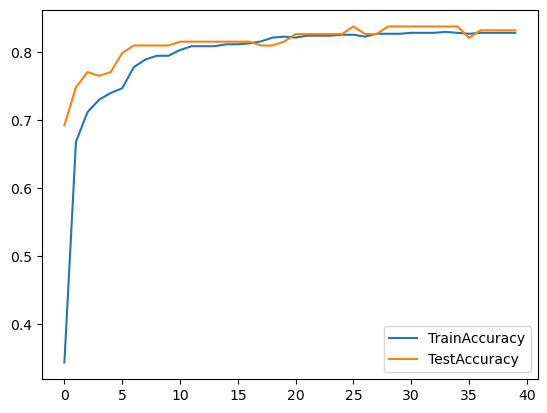

In [25]:
plt.plot(trainAccuracy, label="TrainAccuracy")
plt.plot(testAccuracy, label="TestAccuracy")
plt.legend()